<a href="https://colab.research.google.com/github/nicobotti91/coderds/blob/main/ProyectoDSParteII_Botti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import de Librerías


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Lectura de DataFrames

In [2]:
df_orders = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/orders.csv')

In [3]:
df_order_items = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/order_items.csv')

In [4]:
df_products = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/products.csv')

In [5]:
df_sellers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/sellers.csv')

In [6]:
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/geolocation.csv')

## Análisis de estado de DataFrames, Merge & Limpieza

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_products.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
df_products.drop(columns=['product_name_length','product_description_length','product_photos_qty'], axis=1, inplace=True)
df_products.head()

,product_id,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [10]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
df_merge_v1 =  df_orders.merge(
    df_order_items,
    how ='inner',
    on= 'order_id'
)

In [21]:
df_merge_v2 =  df_merge_v1.merge(
    df_products,
    how ='inner',
    on= 'product_id'
)
df_merge_v2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotive,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet Shop,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationary store,250.0,51.0,15.0,15.0


In [22]:
df_target_sales =  df_merge_v2.merge(
    df_sellers,
    how ='inner',
    on= 'seller_id'
)
df_target_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,housewares,500.0,19.0,8.0,13.0,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumery,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotive,420.0,24.0,19.0,21.0,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet Shop,450.0,30.0,10.0,20.0,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,stationary store,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP


In [23]:
# Tamaño del DataFrame

df_target_sales.shape

(112650, 22)

In [24]:
# Info del DataFrame

df_target_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [25]:
# Pasar la fecha a formato fecha
df_target_sales['order_purchase_timestamp'] = pd.to_datetime(df_target_sales['order_purchase_timestamp'])

In [26]:
# Pasar la fecha a formato Mes y Año
df_target_sales.loc[:, 'mes_anyo'] = df_target_sales['order_purchase_timestamp'].dt.strftime('%B %Y')
df_target_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,housewares,500.0,19.0,8.0,13.0,9350,maua,SP,October 2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumery,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,July 2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotive,420.0,24.0,19.0,21.0,14840,guariba,SP,August 2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet Shop,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,November 2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,stationary store,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP,February 2018


In [28]:
# Contabilizar los NaN
df_target_sales.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [29]:
df_target_sales.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date'], axis=1, inplace=True)
df_target_sales.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [30]:
# Borrar filas con NaN & Tamaño del DataFrame post eliminación

df_target_sales_cleaned = df_target_sales.dropna()
df_target_sales_cleaned.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [39]:
df_target_sales_cleaned.rename(columns={'product category':'product_category'}, inplace=True)
df_target_sales_cleaned.head()

<ipython-input-39-da3fd7af963d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_sales_cleaned.rename(columns={'product category':'product_category'}, inplace=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,freight_value,product_category,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,8.72,housewares,500.0,19.0,8.0,13.0,9350,maua,SP,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,22.76,perfumery,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,19.22,automotive,420.0,24.0,19.0,21.0,14840,guariba,SP,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,...,27.20,pet Shop,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,...,8.72,stationary store,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP,2018-02-01


In [31]:
df_target_sales_cleaned.shape

(111032, 21)

#Análisis del DF

In [48]:
df_target_sales_cleaned.groupby(by='mes_anyo').agg({'order_id':'count'}).reset_index().sort_values(by=['mes_anyo'])

,mes_anyo,order_id
0,2016-09-01,6
1,2016-10-01,361
2,2016-12-01,1
3,2017-01-01,939
4,2017-02-01,1881
5,2017-03-01,2937
6,2017-04-01,2613
7,2017-05-01,4040
8,2017-06-01,3520
9,2017-07-01,4458


In [51]:
df_target_sales_vf = df_target_sales_cleaned[df_target_sales_cleaned['mes_anyo']>='January 2017']
df_target_sales_vf.groupby(by='mes_anyo').agg({'order_id':'count','product_category':'nunique','seller_id':'nunique'}).reset_index().sort_values(by=['mes_anyo'])

,mes_anyo,order_id,product_category,seller_id
0,2017-01-01,939,43,222
1,2017-02-01,1881,50,410
2,2017-03-01,2937,53,490
3,2017-04-01,2613,58,495
4,2017-05-01,4040,59,571
5,2017-06-01,3520,60,524
6,2017-07-01,4458,61,591
7,2017-08-01,4833,63,691
8,2017-09-01,4757,65,714
9,2017-10-01,5249,63,760


## Hipótesis, Análisis y Visualización del DataFrame

### ---> Hipótesis 1:

#### ¿Cual es el top 10 de categorías que se venden en 2018?

<ipython-input-32-7a0f843c4ae3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])
<ipython-input-32-7a0f843c4ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])


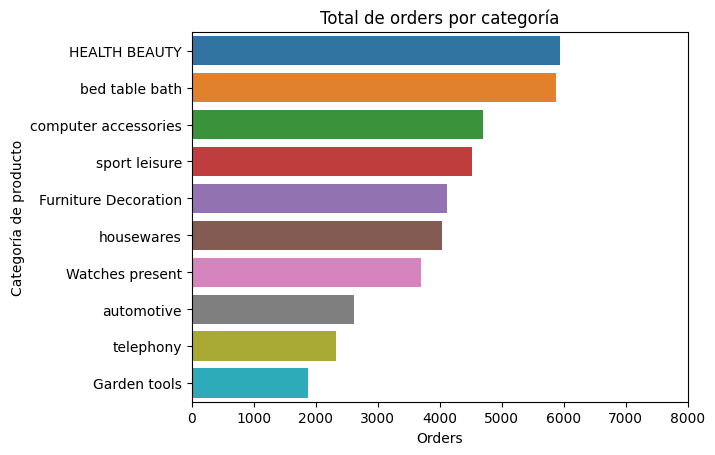

In [32]:
# Agrupar por mes, año y categoría y contar los pedidos
df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])
orders_2018 = df_target_sales_cleaned[df_target_sales_cleaned['mes_anyo'] >= '2018-01-01']
orders_categoria = orders_2018.groupby(['product category'])['order_id'].count().reset_index()
orders_categoria_sorted_top10 = orders_categoria.sort_values(by='order_id',ascending=False).head(10)

# Crear el gráfico con una línea para cada categoría
sns.barplot(data=orders_categoria_sorted_top10, x='order_id', y='product category',hue='product category')


# Configurar el gráfico
plt.title('Total de orders por categoría')
plt.xlabel('Orders')
plt.ylabel('Categoría de producto')
plt.xlim(0, 8000)
##plt.xticks(rotation=90, ha='right')
##plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Las categorías que destacan en orders son HEALTH BEAUTY,bed table bath,computer accesories,sport leisure,Furniture Decoration seguidas por housewares,watches present, automotive, telephony & garden tools

### ---> Hipótesis 2:

#### ¿Como evolucionaron las ventas de las categorías top 5?

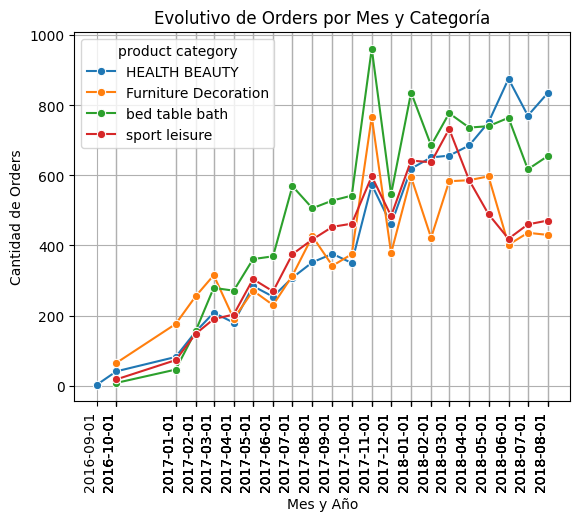

In [ ]:
# Crear el DataFrame filtrando por las categorías top 5 de la hipótesis 1 y ordenarlo por mes_anyo
orders_por_mes_filtered = df_prod_merged_ok[df_prod_merged_ok['product category'].isin(['HEALTH BEAUTY','bed table bath','computer accesories','sport leisure','Furniture Decoration'])]
orders_por_mes = orders_por_mes_filtered.groupby(['mes_anyo','product category'])['order_id'].count().reset_index()
orders_por_mes['mes_anyo'] = pd.to_datetime(orders_por_mes['mes_anyo'])
orders_por_mes_sorted = orders_por_mes.sort_values(by='mes_anyo')

# Crear el gráfico con una línea para cada categoría
sns.lineplot(data=orders_por_mes, x='mes_anyo', y='order_id', hue='product category', marker="o",)

# Configurar el gráfico
plt.title('Evolutivo de Orders por Mes y Categoría')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Orders')
plt.xticks(orders_por_mes['mes_anyo'], rotation=90, ha='right')
plt.grid(True)
##plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

#### Las ventas de las categorías Top 5 parecen crecer en la misma sintonía a lo largo de los meses desde el 2016 hacia el 2018

### ---> Hipótesis 3:

#### ¿Hay relación entre el costo de envío y el tamaño del producto?¿ Y respecto al peso?

In [ ]:
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]
df_agosto_2018['tamanyo_producto'] = df_agosto_2018['product_length_cm'] * df_prod_merged_ok['product_height_cm'] * df_prod_merged_ok['product_width_cm']

<ipython-input-137-679a699e68f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agosto_2018['tamanyo_producto'] = df_agosto_2018['product_length_cm'] * df_prod_merged_ok['product_height_cm'] * df_prod_merged_ok['product_width_cm']


<Axes: xlabel='freight_value', ylabel='tamanyo_producto'>

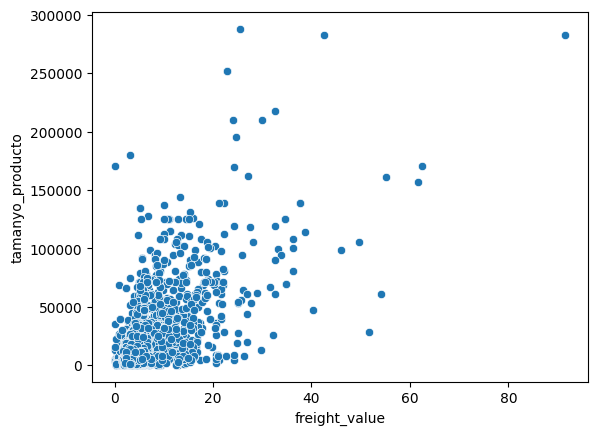

In [ ]:
sns.scatterplot(data=df_agosto_2018, x='freight_value', y='tamanyo_producto')

<Axes: xlabel='freight_value', ylabel='product_weight_g'>

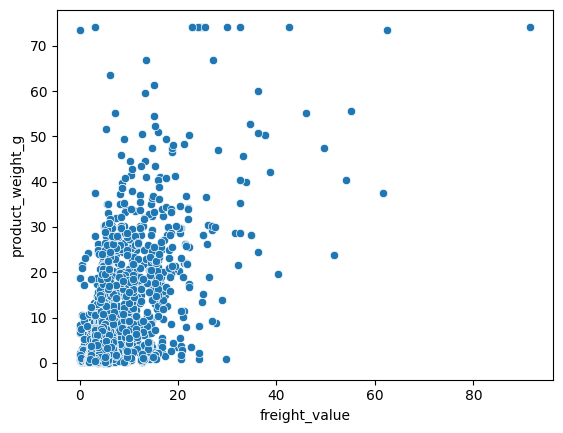

In [ ]:
sns.scatterplot(data=df_agosto_2018, x='freight_value', y='product_weight_g')

#### En relación al Tamaño: Si bien no es una relación tan directa, parece ser que a mayor tamaño mayor es el costo del envío

#### En relación al Peso: Si bien parece haber cierta relación, vemos muchos casos donde el peso del producto no infiere en el costo del envío

### ---> Hipótesis 4:

#### ¿Cuál es la distribución de orders por Sellers dentro de un mes?

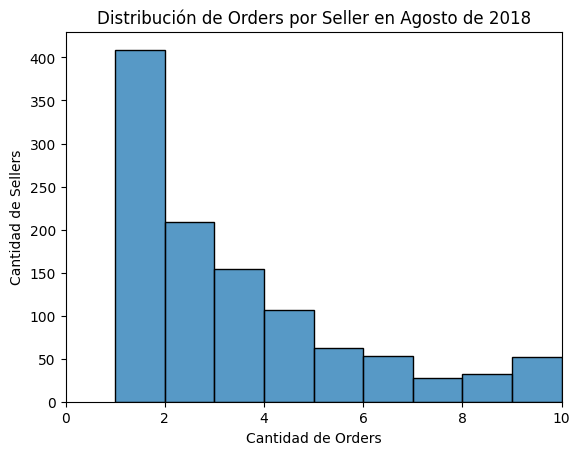

In [ ]:
# Filtrar df_prod_merged_ok por agosto de 2018
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]

# Agrupar por seller_id y contar la cantidad de órdenes en agosto de 2018
orders_por_seller_agosto = df_agosto_2018.groupby('seller_id')['order_id'].count().reset_index()

# Crear el histograma
sns.histplot(data=orders_por_seller_agosto, x='order_id', bins=[1,2,3,4,5,6,7,8,9,10], stat='count')

# Configurar el gráfico
plt.title('Distribución de Orders por Seller en Agosto de 2018')
plt.xlabel('Cantidad de Orders')
plt.ylabel('Cantidad de Sellers')
plt.xlim(0, 10)
plt.show()

<ipython-input-136-7b351927cfb9>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_percentages = orders_por_seller_agosto.groupby('cluster')['seller_id'].count() / len(orders_por_seller_agosto) * 100


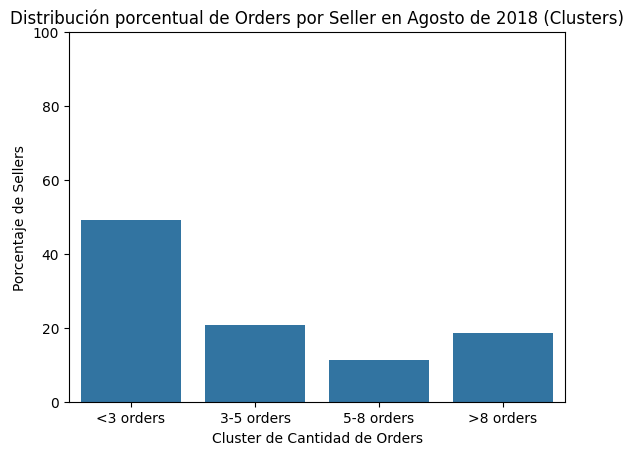

In [ ]:
# Filtrar df_prod_merged_ok por agosto de 2018
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]

# Agrupar por seller_id y contar la cantidad de órdenes en agosto de 2018
orders_por_seller_agosto = df_agosto_2018.groupby('seller_id')['order_id'].count().reset_index()

# Crear una nueva columna 'cluster' para agrupar por cantidad de órdenes
orders_por_seller_agosto['cluster'] = pd.cut(
    orders_por_seller_agosto['order_id'],
    bins=[0, 3, 5, 8, float('inf')],
    labels=['<3 orders', '3-5 orders', '5-8 orders', '>8 orders'],
    right=False  # Incluir el límite inferior en el intervalo
)

# Agrupar por cluster y calcular el porcentaje de sellers
cluster_percentages = orders_por_seller_agosto.groupby('cluster')['seller_id'].count() / len(orders_por_seller_agosto) * 100

# Crear el histograma con porcentajes
sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values)

# Configurar el gráfico
plt.title('Distribución porcentual de Orders por Seller en Agosto de 2018 (Clusters)')
plt.xlabel('Cluster de Cantidad de Orders')
plt.ylabel('Porcentaje de Sellers')
plt.ylim(0, 100)
plt.show()

#### La mayoría de los sellers solamente tienen asociado 1 sola order order al mes, que agrupados en el cluster de menos de 3 orders al mes hacen aproximadamente el 50%